In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

In [91]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [94]:
df[df.duplicated()].sum()

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [95]:
# Feature Selection for model buidling

# We dont need customer Id since its not ginv=nd any information for clustering
# We dont require Gender & Age column also since its nt asked in this use case
# Lets extract only rest of the columns for the cluster prediction

X = df.iloc[:, 3:] 
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

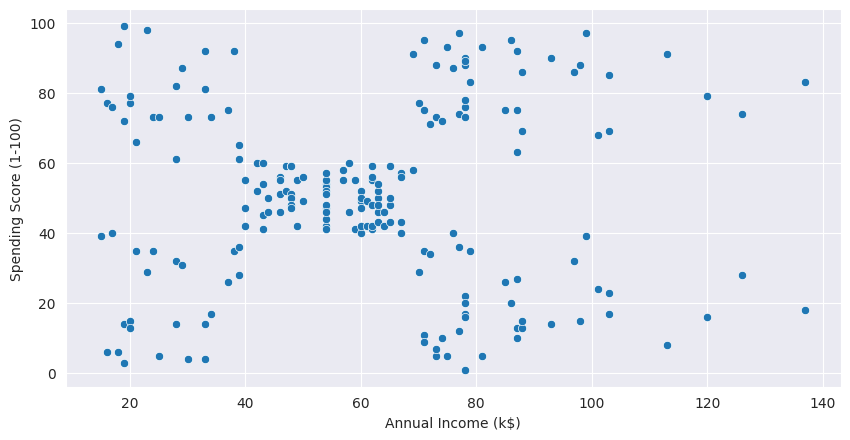

In [96]:
sns.scatterplot (x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'])

**Feature Scaling**



*   In **clustering**, we always deal with distances, so feature scaling is **mandatory**




In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [98]:
from sklearn.cluster import KMeans
km = KMeans()
cluster = km.fit_predict(X)             #default n_cluster formed will be 8 clusters
cluster

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 7, 0, 7, 2, 7, 2, 7,
       0, 7, 2, 7, 2, 7, 2, 7, 2, 7, 0, 7, 2, 7, 0, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 2, 7, 0, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1], dtype=int32)

**Elbow Graph**

In [99]:
wcss = []

for i in range(1,20):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)   #wcss is also called as inertia

In [100]:
wcss

[400.00000000000006,
 270.70426664306717,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.06779591451967,
 44.91118554999014,
 37.197786918695634,
 32.44865134833634,
 29.11556455754576,
 26.54075372871074,
 23.721861418552773,
 21.31025096289971,
 18.900154482400737,
 17.78436781886991,
 16.014104346380797,
 15.050864871014092,
 14.280439492221026,
 13.167032932910683]

Text(0, 0.5, 'WCSS')

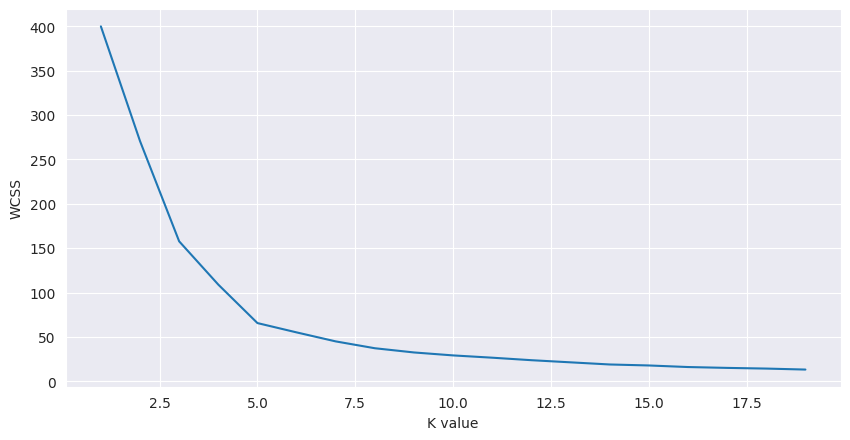

In [101]:
plt.plot(range(1,20), wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')

As we can see, from the elbow graph k =5 can be a optimal cluster. Lets check

In [102]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 5)
cluster = km.fit_predict(X)            
cluster

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [103]:
X['Clusters'] = cluster
X.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,3


In [104]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

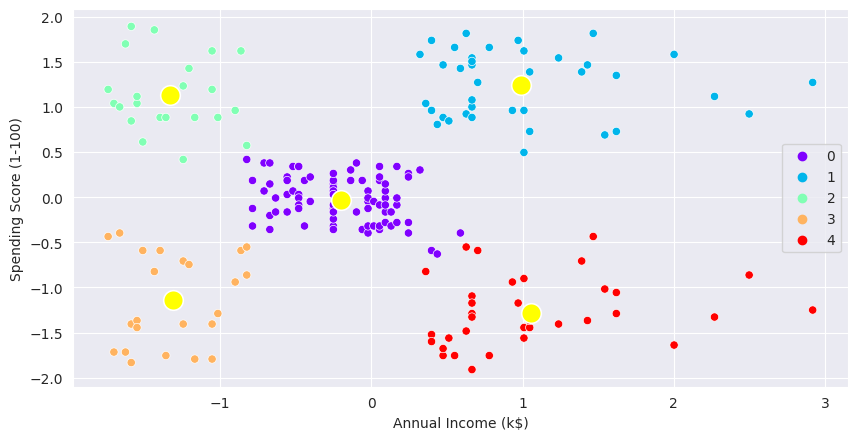

In [105]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = X, hue = 'Clusters', palette ='rainbow')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], c = 'yellow', s = 200)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

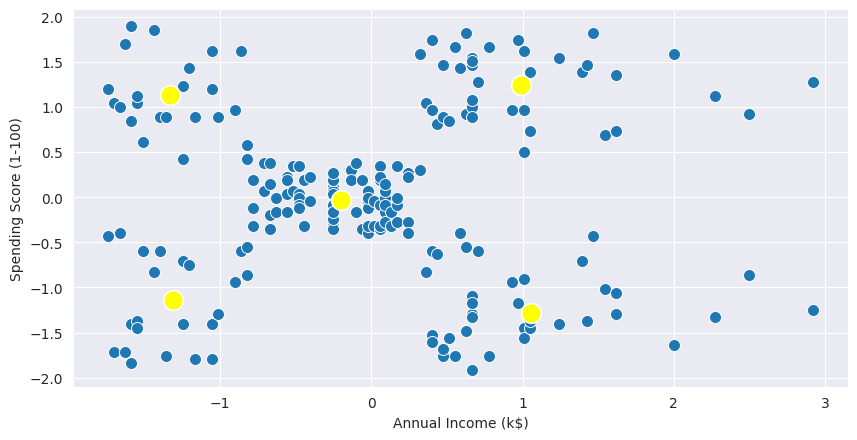

In [106]:
# we can also simply plot

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = X, s = 75)
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], c = 'yellow', s = 200)


In [112]:
X.groupby('Clusters').agg('mean')

,Annual Income (k$),Spending Score (1-100)
Clusters,,
0,-0.200913,-0.026456
1,0.991583,1.239503
2,-1.329545,1.132178
3,-1.307519,-1.136965
4,1.055003,-1.284439


In [110]:
df['Cluster'] = cluster
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


In [123]:
df = df.drop(['CustomerID'], axis =1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [129]:
df.groupby('Cluster').agg('mean')

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


As we can see, the clusters are made upon

1.   People whose income is moderate and spending is moderate
2.   People whose income is high and spending is high
3.   People whose income is less and spending is high
4.   People whose income is less and spending is less
5.   People whose income is high and spending is less







In [131]:
df[df['Cluster']== 4].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,35.000000,35.000000,35.000000,35.0
mean,41.114286,88.200000,17.114286,4.0
std,11.341676,16.399067,9.952154,0.0
min,19.000000,70.000000,1.000000,4.0
25%,34.000000,77.500000,10.000000,4.0
50%,42.000000,85.000000,16.000000,4.0
75%,47.500000,97.500000,23.500000,4.0
max,59.000000,137.000000,39.000000,4.0


In [130]:
df[df['Cluster']== 2]


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,Male,21,15,81,2
3,Female,23,16,77,2
5,Female,22,17,76,2
7,Female,23,18,94,2
9,Female,30,19,72,2
11,Female,35,19,99,2
13,Female,24,20,77,2
15,Male,22,20,79,2
17,Male,20,21,66,2
19,Female,35,23,98,2
